In [42]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import random

In [43]:
df_train = pd.read_csv("F:\Coding\ML Projects\DevnagriExpressionSolver\df_final_train.csv")
df_train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,lable
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


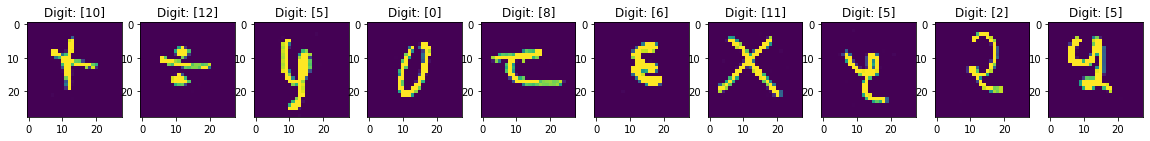

In [44]:
f = plt.figure(figsize = (20, 2))
ax = f.subplots(1, 10)

for i in range(0, 10):
    n = random.randint(1, 230)
    im = np.array(df_train.iloc[n : n + 1, 0 : 784]).reshape(28, 28)
    lable = np.array(df_train.iloc[n : n + 1, 784:])
    ax[i].imshow(im)
    ax[i].set_title(f'Digit: {lable[0]}')
#     print("[Lable = ", lable[0], "]")
#     plt.figure(figsize = (1, 1))
#     plt.imshow(im)
#     plt.show()

In [45]:
df_train_X = df_train.drop(columns = ['lable'])
df_train_y = df_train['lable']

In [157]:
df_train_X.head()
df_train_X.shape

(230, 784)

In [47]:
df_train_y.head(100)

0     0
1     0
2     0
3     0
4     0
     ..
95    5
96    5
97    5
98    5
99    5
Name: lable, Length: 100, dtype: int64

In [48]:
df_test = pd.read_csv("F:\Coding\ML Projects\DevnagriExpressionSolver\df_final_test.csv")
df_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,lable
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4


In [49]:
df_test_X = df_test.drop(columns = ['lable'])
df_test_y = df_test['lable']

In [153]:
df_test_X.head()
df_test_X.shape

(70, 784)

In [51]:
df_test_y.head()

0    0
1    1
2    2
3    3
4    4
Name: lable, dtype: int64

In [195]:
model = RandomForestClassifier(n_estimators = 150, criterion='entropy')
# model = LogisticRegression()
# n_estimators = 60, criterion='entropy'

In [196]:
model.fit(df_train_X, df_train_y)

RandomForestClassifier(criterion='entropy', n_estimators=150)

In [197]:
model.score(df_test_X, df_test_y)

0.8

In [200]:
model.predict(df_test_X.iloc[41:42, 0:])

array([1], dtype=int64)

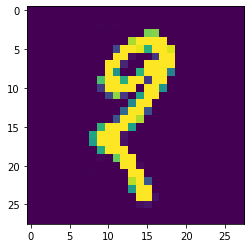

In [201]:
plt.imshow(np.array(df_test_X.iloc[41:42, 0:]).reshape(28, 28))

In [161]:
import pickle

In [162]:
# fileName = "digit_classifier_model.pkl"
# pickle.dump(model, open(fileName, 'wb'))